### Loading the data

In [1]:
!kaggle datasets download priyamchoksi/1-million-reddit-jokes-rjokes

Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/1-million-reddit-jokes-rjokes
License(s): Attribution 4.0 International (CC BY 4.0)
1-million-reddit-jokes-rjokes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip 1-million-reddit-jokes-rjokes.zip -d data

Archive:  1-million-reddit-jokes-rjokes.zip
  inflating: data/one-million-reddit-jokes.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('data/one-million-reddit-jokes.csv')
df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,ftbp1i,2qh72,jokes,False,1585785543,https://old.reddit.com/r/Jokes/comments/ftbp1i...,self.jokes,NaN,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!,2
1,post,ftboup,2qh72,jokes,False,1585785522,https://old.reddit.com/r/Jokes/comments/ftboup...,self.jokes,NaN,It's called Google Sheets.,Did you know Google now has a platform for rec...,9
2,post,ftbopj,2qh72,jokes,False,1585785508,https://old.reddit.com/r/Jokes/comments/ftbopj...,self.jokes,NaN,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...,15
3,post,ftbnxh,2qh72,jokes,False,1585785428,https://old.reddit.com/r/Jokes/comments/ftbnxh...,self.jokes,NaN,[removed],My last joke for now.,9
4,post,ftbjpg,2qh72,jokes,False,1585785009,https://old.reddit.com/r/Jokes/comments/ftbjpg...,self.jokes,NaN,[removed],The Nintendo 64 turns 18 this week...,134


In [55]:
df.describe()

,created_utc,score
count,1.000000e+06,1000000.000000
mean,1.513420e+09,139.691119
std,4.258010e+07,1674.046005
min,1.427397e+09,0.000000
25%,1.480221e+09,0.000000
50%,1.512993e+09,1.000000
75%,1.550497e+09,7.000000
max,1.585786e+09,142733.000000


In [56]:
df.isnull().sum()

type                   0
id                     0
subreddit.id           0
subreddit.name         0
subreddit.nsfw         0
created_utc            0
permalink              0
domain                 0
url               995528
selftext            4475
title                  0
score                  0
dtype: int64

In [57]:
df.drop(columns=['url'], inplace=True)

In [58]:
df.dropna(inplace=True)

In [59]:
df.isnull().sum()

type              0
id                0
subreddit.id      0
subreddit.name    0
subreddit.nsfw    0
created_utc       0
permalink         0
domain            0
selftext          0
title             0
score             0
dtype: int64

### EDA

In [60]:
df.columns

Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'selftext', 'title', 'score'],
      dtype='object')

In [61]:
# Let's see the two outliers in dataset
    
df[df['score'] >= 120000]['permalink']

29360     https://old.reddit.com/r/Jokes/comments/f6lii3...
511072    https://old.reddit.com/r/Jokes/comments/7ekt23...
Name: permalink, dtype: object

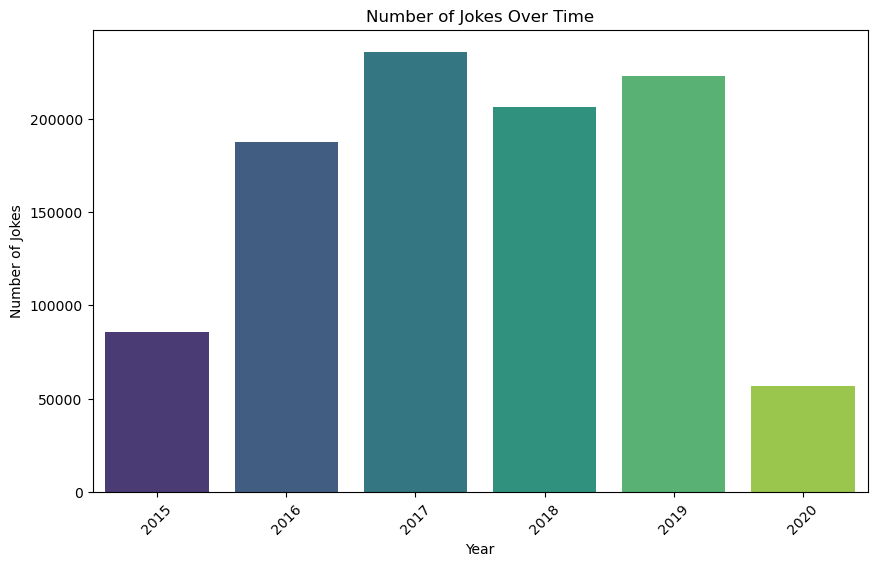

In [62]:

# Plot 2: Number of jokes over time
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df['year'] = df['created_utc'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Jokes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Jokes')
plt.xticks(rotation=45)
plt.show()

In [63]:
# Min and max values of created_utc in each year
df.groupby('year')['created_utc'].agg(['min', 'max'])


,min,max
year,,
2015,2015-03-26 19:04:06,2015-12-31 23:59:15
2016,2016-01-01 00:02:57,2016-12-31 23:59:39
2017,2017-01-01 00:00:26,2017-12-31 23:56:57
2018,2018-01-01 00:04:35,2018-12-31 23:59:09
2019,2019-01-01 00:00:19,2019-12-31 23:58:52
2020,2020-01-01 00:01:33,2020-04-01 23:59:03


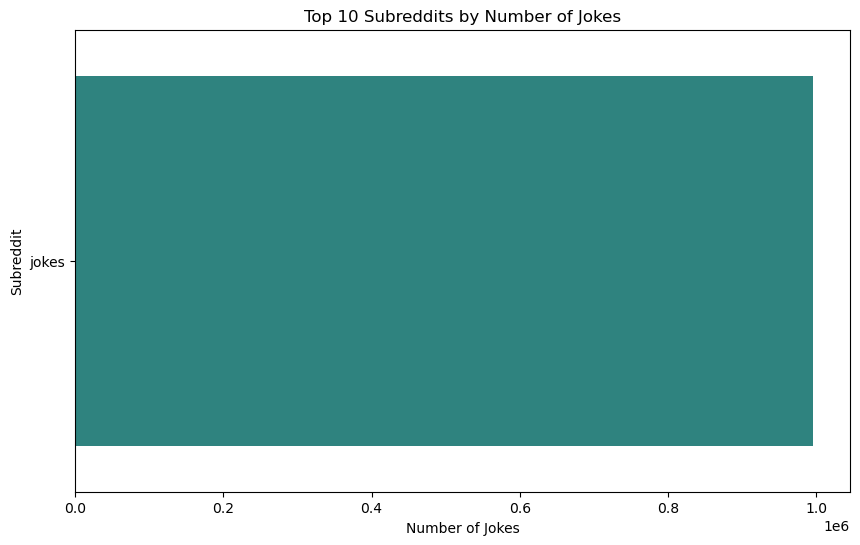

In [64]:
# Plot 3: Top 10 subreddits by number of jokes
top_subreddits = df['subreddit.name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_subreddits.values, y=top_subreddits.index, palette='viridis')
plt.title('Top 10 Subreddits by Number of Jokes')
plt.xlabel('Number of Jokes')
plt.ylabel('Subreddit')
plt.show()

In [65]:
df.columns

Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'selftext', 'title', 'score',
       'year'],
      dtype='object')

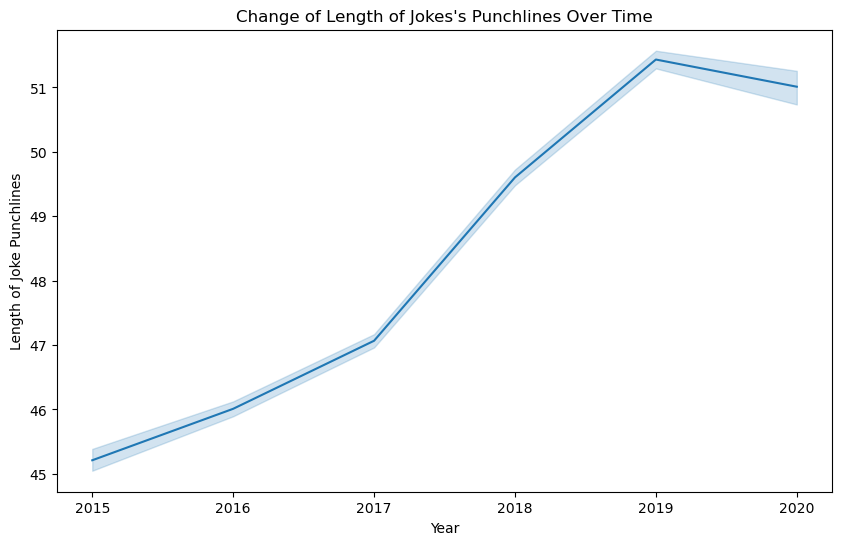

In [66]:
# Change of length of jokes over time
df['setup_length'] = df['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='setup_length', data=df)
plt.title('Change of Length of Jokes\'s Punchlines Over Time')
plt.xlabel('Year')
plt.ylabel('Length of Joke Punchlines')
plt.show()

In [67]:
len(df)

995525

In [68]:
# Deleted rows where title contains 'deleted' or 'removed'
df = df[~df['title'].str.contains('deleted|removed')]
df = df[~df['selftext'].str.contains('deleted|removed')]

In [73]:
# 5 random jokes
sample = df[df['score'] > 200].sample(5, random_state=20)
print(sample['title'].values)
print(sample['selftext'].values)
print(sample['score'].values)

['my grandma talking to my dad about her new hearing aid'
 '(Long) An elderly man was sitting on his porch one day..'
 'Before my surgery, my anesthetist offered to knock me out with either gas or a boat paddle.'
 'With the way I see Asian people driving, it got me thinking...'
 'The first rule of Passive Aggressive Club is...']
['"it\'s the most expensive one u can buy, it cost me $4,000.”\n\nmy dad: "what kind is it?"\n\nmy grandma: "it\'s 4:15pm"'
 '..when Tommy, the 9 year old neighborhood troublemaker, came walking up the street dragging some metal fencing behind him.\n\nThe man yelled "Tommy, what are you doing this time?\nTommy: This is chicken wire, I\'m gonna catch me some chickens.\nMan: "Tommy you fool, you can\'t catch chickens with that"\n\nAt the end of the day, here came Tommy walking the other way with the chicken wire dragging behind him and there were about a dozen chickens caught up in it.  The man just shook his head.\n\nThe next day the man was back out on the porc

(-0.5, 799.5, 399.5, -0.5)

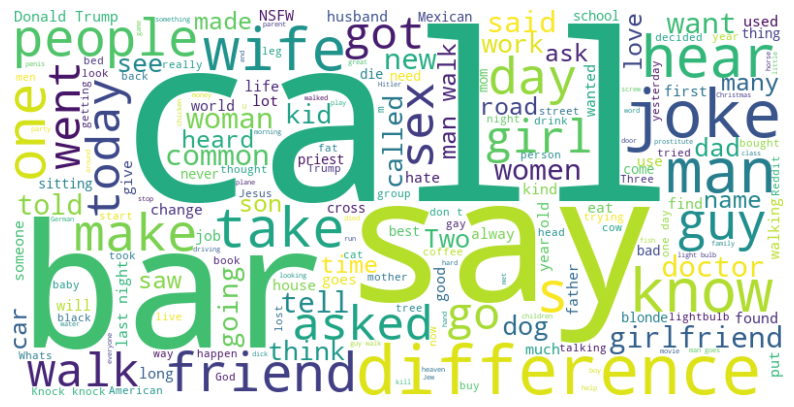

In [32]:
# Wordcloud of jokes
from wordcloud import WordCloud

text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

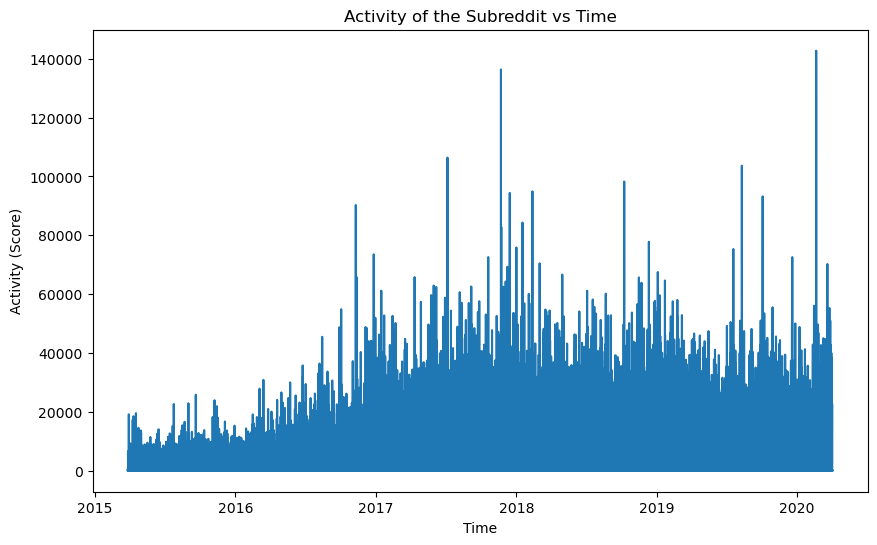

In [19]:
# Activity of the sub-reddit based on the score vs time
plt.figure(figsize=(10, 6))
sns.lineplot(x='created_utc', y='score', data=df)
plt.title('Activity of the Subreddit vs Time')
plt.xlabel('Time')
plt.ylabel('Activity (Score)')
plt.show()

In [20]:
!pip install praw

In [ ]:
import praw

# Set up your Reddit API credentials
client_id = 'Bvmuwm2n0Na6MZx_74aF4w'
client_secret = 'vN3nmc_nXilesrKlfCf8mWKZGPtymg'
user_agent = 'omkar_j3602'


print("Start connecting to Reddit API")
# Initialize PRAW with the provided credentials
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)
print("Connected to Reddit API")


# Recursive function to get replies in a nested tree structure
def get_comment_tree(comment):
    # Start with the comment itself
    comment_data = {
        'comment': comment.body,
        'replies': []
    }
    
    # If there are replies, recursively add them to the tree
    if len(comment.replies) > 0:
        for reply in comment.replies:
            reply_data = get_comment_tree(reply)  # Recursively get replies
            comment_data['replies'].append(reply_data)
    
    return comment_data

# Function to get all comments and build the comment tree
def get_reddit_comments_tree(post_url):
    # Extract the post ID from the URL
    post_id = post_url.split('/')[-3]
    
    # Fetch the post using its ID
    submission = reddit.submission(id=post_id)
    
    # Fetch the comments of the post
    submission.comments.replace_more(limit=None)  # Fetch all comments
    
    comment_tree = []
    
    for comment in submission.comments.list():
        # Get the tree structure for each comment
        comment_data = get_comment_tree(comment)
        comment_tree.append(comment_data)
    
    return comment_tree

# Function to print the comment tree in a human-readable format
def print_comment_tree(comment_data, level=0):
    indent = '  ' * level
    print(f"{indent}Comment: {comment_data['comment']}")
    
    if comment_data['replies']:
        print(f"{indent}Replies:")
        for reply in comment_data['replies']:
            print_comment_tree(reply, level + 1)  # Recursively print replies

# Example usage:
post_url = input("Enter the Reddit post URL: ")
comment_tree = get_reddit_comments_tree(post_url)

# Display the comment tree
print("\nReddit Comment Tree:")
for i, comment_data in enumerate(comment_tree, 1):
    print(f"Root Comment {i}: {comment_data['comment']}")
    print_comment_tree(comment_data, 1)
    print("\n")

In [22]:
df.columns

Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'selftext', 'title', 'score',
       'year', 'setup_length'],
      dtype='object')

In [33]:
# Preprocess the jokes data (title, selftext) (Tokenization, Lemmatization, Stopword Removal)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english') + [
    'cant', 'dont', 'even', 'get', 'go', 'going', 'im', 'ive', 'like', 'really', 'want',
    'also', 'anyone', 'back', 'would', 'things', 'one', 'much', 'feeling', 'got', 'know',
    'never', 'since', 'always', 'something', 'started', 'still', 'take', 'anything', 'could',
    'getting', 'last', 'think', 'else', 'every', 'everything', 'lot', 'make', 'way', 'ago',
    'better', 'didnt', 'see', 'someone', 'went', 'well', 'thoughts', 'well', 'trying', 'first',
    'right', 'thought', 'person', 'ever', 'self', 'without', 'best', 'looking', 'day', 'ever',
    'broke', 'without', 'best', 'looking', 'ever', 'said', 'shes', 'hes', 'made', 'talk', 'tell',
    'thing', 'days', 'away', 'around', 'try', 'thats', 'times', 'saying', 'wasnt', 'doesnt', 'say',
    'wanted', 'nothing', 'anymore', 'keep', 'two', 'point', 'let', 'makes', 'asked', 'talking',
    'normal', 'actually', 'come', 'sure', 'many', 'done', 'find', 'though', 'end', 'left', 'deal',
    'maybe', 'stop', 'give', 'whats', 'etc', 'almost', 'little', 'everyone', 'tired', 'long', 'post',
    'id', 'able', 'another', 'says', "i", "am", "did", "does", "do", "was", "were", "will", "are", "be", "been", 
    "being", "have", "has", "had", "having", "shall", "should", "would", "may", "might", "must", "can", "could", 
    "ought", "dare", "need", "used", "seem", "see", "look", 
    "appear", "sound", "smell", "taste", "feel", "become", "get", "grow", "turn", "prove", "remain","removed", "deleted",
    "ampx200b",
    "asks", "told", "oh", "put", "next"
])

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and numbers
    table = str.maketrans('', '', string.punctuation + string.digits)
    tokens = [t.translate(table) for t in tokens]
    
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    
    # Lemmatize the tokens
    # tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return ' '.join(tokens)

# Apply the preprocessing to the jokes data
df['title'] = df['title'].apply(preprocess_text)
df['selftext'] = df['selftext'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package punkt to /Users/omkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/omkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/omkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,selftext,title,score
0,post,ftbp1i,2qh72,jokes,False,1585785543,https://old.reddit.com/r/Jokes/comments/ftbp1i...,self.jokes,corona covered foreskin exposed viruses,soooo glad circumcised,2
1,post,ftboup,2qh72,jokes,False,1585785522,https://old.reddit.com/r/Jokes/comments/ftboup...,self.jokes,called google sheets,google platform recording bowel movements,9
2,post,ftbopj,2qh72,jokes,False,1585785508,https://old.reddit.com/r/Jokes/comments/ftbopj...,self.jokes,vacuum nt snore sex amp xb april fools n...,difference wife vacuum,15
7,post,ftbeb4,2qh72,jokes,False,1585784461,https://old.reddit.com/r/Jokes/comments/ftbeb4...,self.jokes,oo lala,french man attractive teletubby,2
10,post,ftbahg,2qh72,jokes,False,1585784081,https://old.reddit.com/r/Jokes/comments/ftbahg...,self.jokes,yo momma fat zoo hippos jealous,yo mama,0


(-0.5, 799.5, 399.5, -0.5)

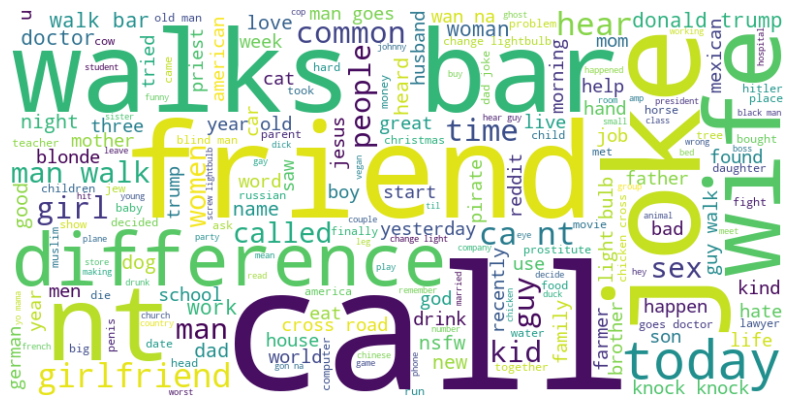

In [36]:
text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

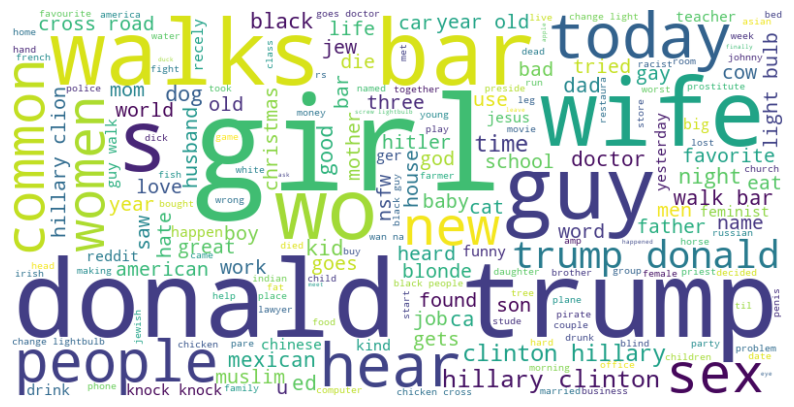

In [42]:
# Ensure 'created_utc' is in datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')


# Generate word cloud for jokes created in 2016
text = ' '.join(df[df['created_utc'].dt.year == 2016]['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [35]:
# Use TfidfVectorizer to convert text data into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine the title and selftext into a single column
df['joke'] = df['title'] + ' ' + df['selftext']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data
X = vectorizer.fit_transform(df['joke'])

# Display the shape of the transformed data
X.shape

(572446, 1000)

In [37]:
# Perform KMeans clustering on the jokes data
from sklearn.cluster import KMeans

# Initialize the KMeans model
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
df['cluster'] = kmeans.labels_

# Display the number of jokes in each cluster
print(df['cluster'].value_counts())

# Show 10 most common words in each cluster
# Get the feature names (words) from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Display the 10 most common words in each cluster
for i, center in enumerate(cluster_centers):
    top_features = np.argsort(center)[::-1][:10]
    top_words = [feature_names[j] for j in top_features]
    print(f"Cluster {i}: {', '.join(top_words)}")




/Users/omkar/dev/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    354880
2     43104
5     38662
3     31771
1     29886
9     18518
6     18303
7     17831
8     13767
4      5724
Name: cluster, dtype: int64
Cluster 0: difference, time, friend, girl, favorite, new, year, hear, dad, good
Cluster 1: call, cow, mexican, leg, gay, dog, man, group, woman, nt
Cluster 2: nt, ca, wo, difference, friend, girlfriend, time, work, girl, believe
Cluster 3: man, woman, old, nt, wife, walk, reply, doctor, time, blind
Cluster 4: change, lightbulb, bulb, light, screw, none, nt, feminist, dark, name
Cluster 5: wife, woman, doctor, husband, nt, sex, time, year, home, patient
Cluster 6: joke, nt, funny, hear, dad, na, good, wan, bad, time
Cluster 7: guy, hear, nt, girl, black, gay, call, friend, walk, man
Cluster 8: bar, walk, bartender, man, drink, beer, order, guy, nt, serve
Cluster 9: people, nt, black, world, hate, type, call, joke, understand, ca
